In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
import numpy as np
import healpy as hp
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

Text(300, 0.45, '$C_\\ell = e^{-\\frac{(\\ell-100)^2}{2000}} + e^{-\\frac{(\\ell-200)^2}{10000}}$')

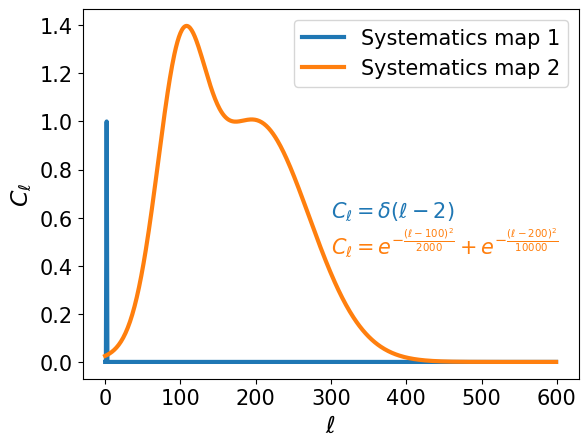

In [55]:
l = np.arange(600)
ells_comtamin1 = np.zeros(600)
ells_comtamin1[2] = 1
plt.plot(l,ells_comtamin1,linewidth = 3, label = "Systematics map 1")

l = np.arange(600)
ells_comtamin2 = np.exp(-(l-100)**2/2000)+np.exp(-(l-200)**2/10000)
plt.plot(l,ells_comtamin2,linewidth = 3, label = "Systematics map 2")
plt.legend(fontsize = 15)
plt.ylabel(r'$C_\ell$',size = 17)
plt.xlabel(r'$\ell$',size = 17)
t = plt.xticks(size = 15)
t = plt.yticks(size = 15)

plt.text(300, 0.6, r'$C_\ell = \delta(\ell-2)$', color = 'C0', size = 15)
plt.text(300, 0.45, r'$C_\ell = e^{-\frac{(\ell-100)^2}{2000}} + e^{-\frac{(\ell-200)^2}{10000}}$', color = 'C1', size = 15)

In [22]:
def generate_density_field(cl , nside = 256, lmax=500):
    """
    Generate a HEALPix map from a given C_l spectrum.
    
    Parameters:
    cl (array): Angular power spectrum C_l
    nside (int): HEALPix nside parameter
    lmax (int, optional): Maximum l to use from the provided cl. If None, use all provided.
    
    Returns:
    array: HEALPix map of the density field
    """
    if lmax is None:
        lmax = len(cl) - 1
    
    # Generate complex a_lm with proper normalization
    alm = hp.synalm(cl, lmax=lmax, new=True)
    
    # Convert a_lm to map
    density_map = hp.alm2map(alm, nside, lmax=lmax)
    #density_map = density_map_init/(density_map_init.max() - density_map_init.min())*2
    #density_map += 1-density_map.min()
    
    
    #total galaxy: 1M
    N_tot = 10**6
    #ave galaxy per pixel
    N_pix = N_tot/(12*nside**2)
    print(density_map.min())
    n_per_pix = (1+density_map)*N_pix
    print(N_pix)
    Poission_noise_amp = np.sqrt(n_per_pix)
    Poission_noise = np.random.poisson(lam = 1, size = len(Poission_noise_amp))*Poission_noise_amp
    
    
    return density_map

-1.161191005090668
1.2715657552083333


/tmp/ipykernel_1156737/740632361.py:32: RuntimeWarning: invalid value encountered in sqrt
  Poission_noise_amp = np.sqrt(n_per_pix)


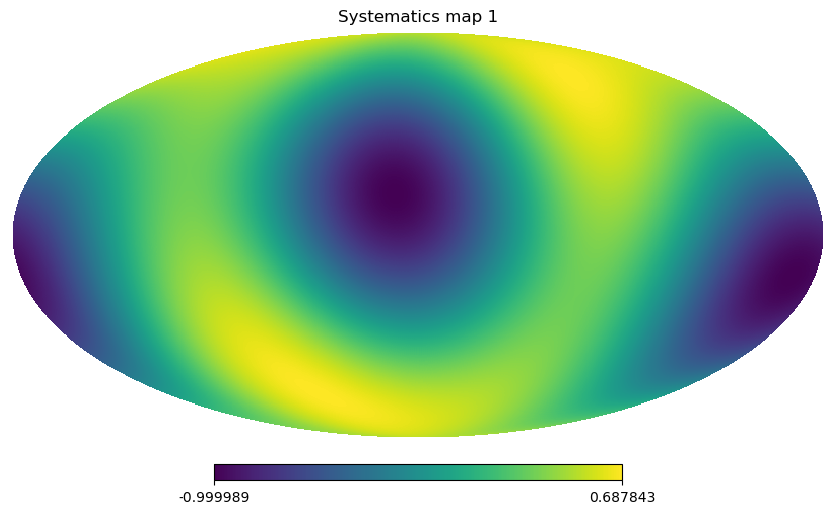

In [34]:
density_field_contamination = generate_density_field(ells_comtamin1, nside=256, lmax=600)
density_field_contamination = density_field_contamination - density_field_contamination.mean()
density_field_contamination = density_field_contamination/np.abs(density_field_contamination.min())
density_field_contamination = np.clip(density_field_contamination, -1,1)
hp.mollview(density_field_contamination,title = "Systematics map 1")

In [35]:
density_field_contamination.mean()

2.3129646346357427e-18

-389.22657437874557
1.2715657552083333


/tmp/ipykernel_1156737/740632361.py:32: RuntimeWarning: invalid value encountered in sqrt
  Poission_noise_amp = np.sqrt(n_per_pix)


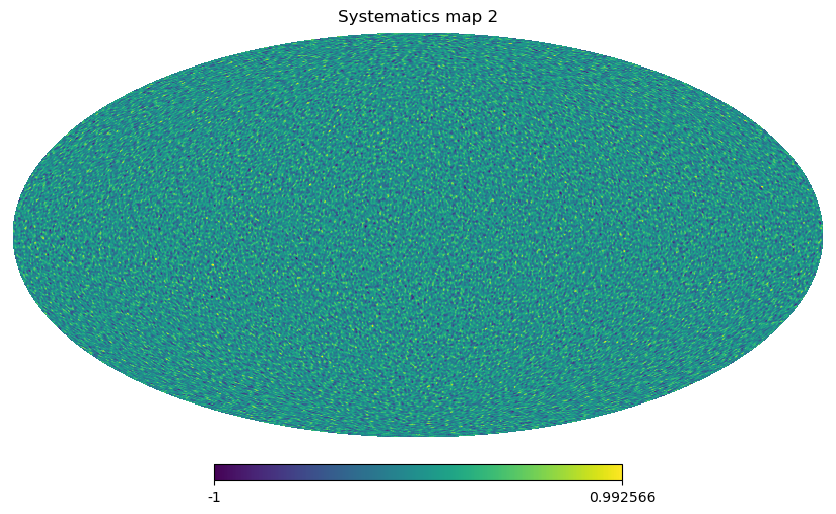

In [36]:
density_field_contamination = generate_density_field(ells_comtamin2, nside=256, lmax=600)
density_field_contamination = (density_field_contamination - density_field_contamination.min())
density_field_contamination = density_field_contamination - density_field_contamination.mean()
density_field_contamination = density_field_contamination/np.abs(density_field_contamination.min())
density_field_contamination = np.clip(density_field_contamination, -1,1)
hp.mollview(density_field_contamination,title = "Systematics map 2")

In [37]:
density_field_contamination.mean()

-5.740928907903587e-08

In [60]:
dat1 = np.loadtxt("large_scale.txt")

In [61]:
dat2 = np.loadtxt("small_scale.txt")

-5.2276825664792395e-05
1.914171324307599e-05


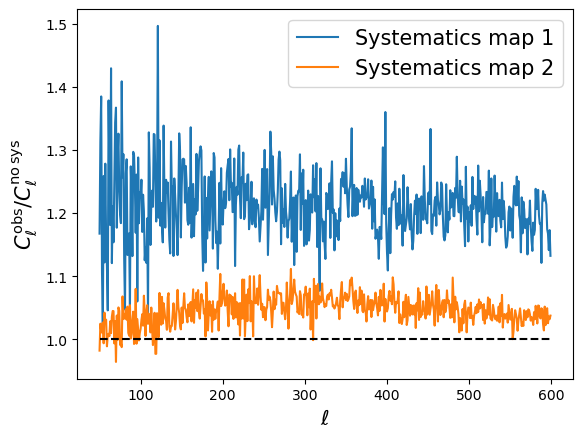

In [62]:
plt.plot(dat1[0], dat1[1], label = "Systematics map 1")

x = dat1[0]
y = dat1[1]
m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, '--k')
print(m)

plt.plot(dat2[0], dat2[1], label = "Systematics map 2")
plt.xlabel(r'$\ell$', size = 15)
plt.ylabel(r'$C_{\ell}^{\mathrm{obs}}/ C_{\ell}^{\mathrm{no\, sys}}$', size = 15)
x = dat2[0]
y = dat2[1]
plt.legend(fontsize = 15)
m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x+b, '--k')
print(m)

plt.plot(dat1[0], np.ones_like(dat1[0]), 'k--')